## eigen_covariance_exercise

In [1]:
### ATOC5860 - eigen_covariance_exercise
## coded by Dr. Eleanor Middlemas (postdoc ATOC/CIRES University of Colorado, now working at Jupiter)
## Last updated February 9, 2022

# Eigenanalysis of a Covariance Matrix
# This code illustrates the usefulness of covariance matrices and associated eigenanalysis.
# We will computing covariance matrices between temperature, pressure, and precipitation from 
# Christman Field in Ft. Collins. 

import numpy as np
import numpy.linalg as LA
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd   ##pandas reads in .csv.
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

In [2]:
## Read in the data: using same data as that from application lab #2.
# This time, the temporal resolution will be fixed.
filename = 'christman_2016.csv'
data=pd.read_csv(filename,sep=',')
TEMP = data['temp_F'][::24] # every 24 hours
RH = data['RH'][::24]
P = data['pres_Hg'][::24]
#data.head() # uncomment if you want to see first few values & header info
print("Shape of TEMP is: ",np.shape(TEMP))

Shape of TEMP is:  (366,)


## Part 1: Compute covariance matrix
Here is an easy, fast way to compute the variance and covariance terms among 3 timeseries of different variables: temperature, relative humidity, and pressure.

In [3]:
# create matrix for easier operations: 
# variables in the columns and their associated observations in rows
ftcollvars = np.matrix([TEMP, RH, P]).T

# What are the dimensions of this matrix?
print("Dimensions of original matrix: ")
print(np.shape(ftcollvars))
print("Dimensions of transposed matrix: ")
print(np.shape(np.transpose(ftcollvars)))

Dimensions of original matrix: 
(366, 3)
Dimensions of transposed matrix: 
(3, 366)


In [4]:
# subtract mean to obtain anomalies
ftcollvars = ftcollvars-np.mean(ftcollvars,axis=0)

# calculate covariance matrix: which one is correct? Why?
C1 = ftcollvars.T@ftcollvars/(len(TEMP)-1)
C2 = ftcollvars@ftcollvars.T/(3.0-1)

# Try numpy's covariance function to test:
Cnp = np.cov(ftcollvars.T)

print("Size of first covariance matrix: ",np.shape(C1))
print("Size of second covariance matrix: ",np.shape(C2))
print("Size of covariance calculated by numpy: ",np.shape(Cnp))

Size of first covariance matrix:  (3, 3)
Size of second covariance matrix:  (366, 366)
Size of covariance calculated by numpy:  (3, 3)


In [5]:
# What is the total variance of temperature, relative humidity, and pressure? 
print("The covariance matrix of temperature, relative humidity, and pressure is:")
print(C1)

The covariance matrix of temperature, relative humidity, and pressure is:
[[273.41966105 -99.1567508    4.63303581]
 [-99.1567508  337.50960761  13.72861915]
 [  4.63303581  13.72861915  32.13956498]]


In [6]:
#  Standard deviation might make more sense.
print("Standard deviation of: ")
print("Temp is ",np.round(np.sqrt(C1[0,0]),2)," degrees C")
print("RH is ",np.round(np.sqrt(C1[1,1]),2),"%")
print("Pressure is ",np.round(np.sqrt(C1[2,2]),2)," Hg")

print("")
print("Check with numpy standard deviation function...")
print("Temp sigma: ",np.round(np.std(TEMP),2)," degrees C")
print("RH sigma: ",np.round(np.std(RH),2),"%")
print("Pressure sigma: ",np.round(np.std(P),2)," Hg")

# Note that the np.std uses N while the covariance matrix you calculated used N-1... 
# that's why they differ slightly here...
# if this difference matters... you probably do not have enough data to be looking at the covariance matrix!

Standard deviation of: 
Temp is  16.54  degrees C
RH is  18.37 %
Pressure is  5.67  Hg

Check with numpy standard deviation function...
Temp sigma:  16.51  degrees C
RH sigma:  18.35 %
Pressure sigma:  5.66  Hg


In [7]:
# How do you interpret the off-diagonal or cross-terms?
print("Covariance between temperature & RH: ")
print(np.round(C1[0,1],2)) 
print(np.round(C1[1,0],2)) # which covariance term is this?

# How do you derive the correlation using the covariance matrix?
# Hint: recall that the relationship between covariance and correlation 
# is that the correlation(x,y) = covariance(x,y)/(sigma_x*sigma_y).
print("Correlation between temperature & RH: ")
corr = C1[0,1]/np.std(TEMP)/np.std(RH)
print(np.round(corr,2))

# Perhaps try looking at other values! :)

Covariance between temperature & RH: 
-99.16
-99.16
Correlation between temperature & RH: 
-0.33


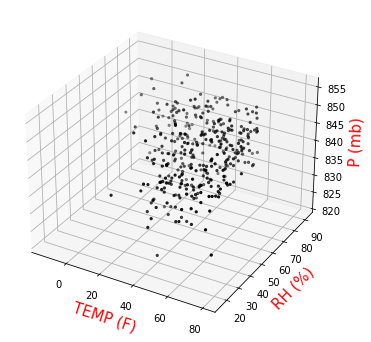

In [20]:
# Plot all three variables:
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.scatter(TEMP, RH, P, s = 5,color='black')
ax.set_xlabel('TEMP (F)')
ax.set_ylabel('RH (%)')
ax.set_zlabel('P (mb)')
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.zaxis.label.set_color('red')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.zaxis.label.set_fontsize(15)

## Part 2. Eigenanalysis on the covariance matrix
What would an eigenanalysis look like on this covariance matrix? What does an eigenanalysis actually do?

In [8]:
# use numpy's linear algebra function (we imported as LA) to compute eigenvalues & eigenvectors.
eigenvals,eigenvecs = LA.eig(C1)

# sort eigenvalues in descending order
inds = np.argsort(eigenvals) # saves indices in ascending order of eigenvals
eigenvals = eigenvals[inds[::-1]]
eigenvecs = eigenvecs[:,inds[::-1]]
print('')
print('eigenvalues: ')
print(eigenvals)
print("")
print('eigenvectors:')
print(eigenvecs)
print("")
print("sum of eigenvalues: ")
print(np.sum(eigenvals))
print("")
print("total variance in data: ")
print(np.sum(np.diag(C1)))


eigenvalues: 
[409.8568668  202.07948336  31.13248348]

eigenvectors:
[[ 0.58726057 -0.80825145 -0.04306536]
 [-0.80909332 -0.5847484  -0.05862861]
 [-0.02220426 -0.06927417  0.99735052]]

sum of eigenvalues: 
643.0688336379967

total variance in data: 
643.0688336379969


Alright, so, these numbers are huge-- especially the eigenvalues, which makes it difficult to interpret physically. Let's get an idea of what they look like geometrically.

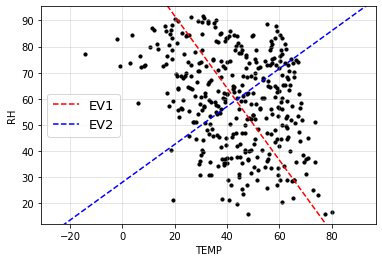

In [9]:
# First plot the two that capture the relationship between temperature & relative humidity. 
# Note that these are subsets of the eigenvectors! I.e., only the first two components of the
# first two eigenvectors.

fig1,ax = plt.subplots()
plt.scatter(TEMP, RH, s=10, color = 'black')
plt.axis('equal')
plt.xlabel('TEMP')
plt.ylabel('RH')
plt.grid(alpha = 0.4)
ylim = plt.ylim()
xlim = plt.xlim()

#plot eigenvector 1
plt.plot([-100*eigenvecs[0,0] + np.mean(TEMP), 100*eigenvecs[0,0] + np.mean(TEMP)],
         [-100*eigenvecs[1,0] + np.mean(RH), 100*eigenvecs[1,0] + np.mean(RH)], 
         linestyle = '--',color = 'red', label = 'EV1');

#plot eigenvector 2
plt.plot([-100*eigenvecs[0,1] + np.mean(TEMP), 100*eigenvecs[0,1] + np.mean(TEMP)],
         [-100*eigenvecs[1,1] + np.mean(RH), 100*eigenvecs[1,1] + np.mean(RH)], 
         linestyle = '--',color = 'blue', label = 'EV2');

plt.ylim(ylim);
plt.xlim(xlim);
plt.legend(fontsize = 13);

Which eigenvector pictured above captures the spread between RH and TEMP the most? The associated eigenvalue represents the amount of variance that this relationship contributes to the total variance among the whole dataset - including the covariance between variables. 

Let's look at the relationship between humidity & pressure.

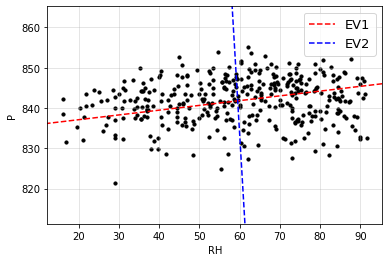

In [10]:
# Now let's try relative humidity & pressure
fig1,ax = plt.subplots()
plt.scatter(RH, P, s=10, color = 'black')
plt.axis('equal')
plt.xlabel('RH')
plt.ylabel('P')
plt.grid(alpha = 0.4)
ylim = plt.ylim()
xlim = plt.xlim()

#plot eigen vector 1
plt.plot([-100*eigenvecs[1,1] + np.mean(RH), 100*eigenvecs[1,1] + np.mean(RH)],
         [-100*eigenvecs[2,1] + np.mean(P), 100*eigenvecs[2,1] + np.mean(P)], 
         linestyle = '--',color = 'red', label = 'EV1');

#plot eigen vector 2
plt.plot([-100*eigenvecs[1,2] + np.mean(RH), 100*eigenvecs[1,2] + np.mean(RH)],
         [-100*eigenvecs[2,2] + np.mean(P), 100*eigenvecs[2,2] + np.mean(P)], 
         linestyle = '--',color = 'blue', label = 'EV2');

plt.ylim(ylim);
plt.xlim(xlim);
plt.legend(fontsize = 13);

Here, it looks like the spread in relative humidity alone dominates the relationship between relative humidity and pressure. This means that, if one calculated a covariance matrix for just humidity & pressure, the off-diagonal terms would be small relative to the diagonal terms.

##  In this example, the eigenvalues do not relate to just one variable like the diagonals of the covariance matrix; instead, the eigenvalues and vectors identify the dominant contributor to spread for the whole dataset.